# Question 1



a) Dimension Reduction <br>
Input - marks of 50 courses <br>
Output - 5 variables

b) Clustering <br>
Input - Students and their performance and extra-curriculars <br>
Output - Clusters of students based on personality

c)Regression <br>
Input - Students and their performance and extra-curriculars <br>
Output - Salary

d) Classification <br>
Input - Students and their performance and extra-curriculars <br>
Output - Job Type

#<h1> Question 2 </h1>

In [ ]:
import math
import pandas as pd
import sklearn as sk
import numpy as np
import seaborn as sb
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV ,cross_validate
from matplotlib import pyplot
from sklearn.model_selection import PredefinedSplit
from sklearn.linear_model import Ridge

In [ ]:
df=pd.read_csv('summer-products-with-rating-and-performance_2020-08.csv') #basic EDA
display(df)
df.shape
df.columns

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,...,568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,...,17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,...,295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,...,23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,...,14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568,Nouvelle Mode Femmes Bohême Pissenlit Imprimer...,New Fashion Women Bohemia Dandelion Print Tee ...,6.00,9,EUR,10000,1,4.08,1367,722.0,...,5316,4.224605,5b507899ab577736508a0782,0,NaN,https://www.wish.com/c/5d5fadc99febd9356cbc52ee,https://contestimg.wish.com/api/webimage/5d5fa...,5d5fadc99febd9356cbc52ee,summer,2020-08
1569,10 couleurs femmes shorts d'été lacent ceintur...,10 Color Women Summer Shorts Lace Up Elastic W...,2.00,56,EUR,100,1,3.07,28,11.0,...,4435,3.696054,54d83b6b6b8a771e478558de,0,NaN,https://www.wish.com/c/5eccd22b4497b86fd48f16b4,https://contestimg.wish.com/api/webimage/5eccd...,5eccd22b4497b86fd48f16b4,summer,2020-08
1570,Nouveautés Hommes Siwmwear Beach-Shorts Hommes...,New Men Siwmwear Beach-Shorts Men Summer Quick...,5.00,19,EUR,100,0,3.71,59,24.0,...,210,3.961905,5b42da1bf64320209fc8da69,0,NaN,https://www.wish.com/c/5e74be96034d613d42b52dfe,https://contestimg.wish.com/api/webimage/5e74b...,5e74be96034d613d42b52dfe,summer,2020-08
1571,Mode femmes d'été sans manches robes col en V ...,Fashion Women Summer Sleeveless Dresses V Neck...,13.00,11,EUR,100,0,2.50,2,0.0,...,31,3.774194,5d56b32c40defd78043d5af9,0,NaN,https://www.wish.com/c/5eda07ab0e295c2097c36590,https://contestimg.wish.com/api/webimage/5eda0...,5eda07ab0e295c2097c36590,summer,2020-08


Index(['title', 'title_orig', 'price', 'retail_price', 'currency_buyer',
       'units_sold', 'uses_ad_boosts', 'rating', 'rating_count',
       'rating_five_count', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count', 'badges_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
       'tags', 'product_color', 'product_variation_size_id',
       'product_variation_inventory', 'shipping_option_name',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'has_urgency_banner', 'urgency_text',
       'origin_country', 'merchant_title', 'merchant_name',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_rating',
       'merchant_id', 'merchant_has_profile_picture',
       'merchant_profile_picture', 'product_url', 'product_picture',
       'product_id', 'theme', 'crawl_month'],
      dtype='object')

In [ ]:
df['product_color'] = df['product_color'].apply(lambda s: s.lower() if type(s) == str else s) #data cleaning 
counter=0 #for column index
for i in df.columns:
  print(counter,i,len(df[i].unique()),df[i].isnull().sum()) #print number of unique values and number of null values
  if len(df[i].unique())<10:
    print(df[i].value_counts()) #print value count of columns with few unique entries
  print('-'*30)
  counter+=1
df=df[df['rating_count']!=0] #remove those rows with no ratings as they should not be used for prediction
print(df.shape) #the new filtered df

0 title 1201 0
------------------------------
1 title_orig 1203 0
------------------------------
2 price 127 0
------------------------------
3 retail_price 104 0
------------------------------
4 currency_buyer 1 0
EUR    1573
Name: currency_buyer, dtype: int64
------------------------------
5 units_sold 15 0
------------------------------
6 uses_ad_boosts 2 0
0    892
1    681
Name: uses_ad_boosts, dtype: int64
------------------------------
7 rating 192 0
------------------------------
8 rating_count 761 0
------------------------------
9 rating_five_count 606 45
------------------------------
10 rating_four_count 441 45
------------------------------
11 rating_three_count 385 45
------------------------------
12 rating_two_count 263 45
------------------------------
13 rating_one_count 331 45
------------------------------
14 badges_count 4 0
0    1422
1     138
2      11
3       2
Name: badges_count, dtype: int64
------------------------------
15 badge_local_product 2 0
0    1544
1

The variable to be predicted is continuous and this is supervised learning problem with the target variable `rating`

The Task at hand deals with regression and hence Mean Square Error is a good measure of perfromance.

Relevant variables are - 
<li>
<t> price , retail price , units_sold ,uses_ad_boosts <br>
These variables give an insight into the consumer       response towards the product
</li>     
<li>
<t> rating , rating_count , rating_five_count , rating_four_count , rating _three_count , rating_two_count , rating_one_count <br>
These variables show us the distributions in rating. Even though these are relevant these should not be used because they leak the data about rating. 
</li>
<li>
<t> badges_count, badge_local_product, badge_product_quality, badge_fast_shipping,has_urgency_banner <br>
These have relevance as they may sway consumer in forming their opinions on the product. However due to low variability in data in the variable it is not much useful to use it
</li>
<li>
<t> tags, product_color, product_variation_size_id, product_variation_inventory <br>
These are relevant as they contain data about the product itself. tags, product_color, product_variation_size_id are categorical variables with many unique values and the data isn't clean.
</li>
<li>
shipping_option_name, shipping_option_price, shipping_is_express, countries_shipped_to <br>
These influene consumer shopping experience and hence affect  the rating indirectly. shipping_option_name and shipping_is_express have low variablity and hence shouldn't be used.
</li>
<li>
merchant_title, merchant_name, merchant_id, merchant_rating_count, merchant_rating <br>
These variables contain data about past performance of a merchant and how a consumer can be expected to react to a product based on merchant reputation. merchant_title , merchant_name and merchant_id are highly correlated but can't be optimally used due to high variability 
</li>


Variables that can be used are - 
<li>
<t> price , retail price , units_sold ,uses_ad_boosts <br>
</li>     
<li>
<t> <strike> rating , rating_count , rating_five_count , rating_four_count , rating _three_count , rating_two_count , rating_one_count </strike> <br> 
</li>
<li>
<t> <strike> badges_count, badge_local_product, badge_product_quality, badge_fast_shipping,has_urgency_banner</strike> 
<br>
</li>
<li>
<t> <strike>tags,  product_variation_size_id, </strike>product_color, product_variation_inventory <br>
</li>
<li>
<strike>shipping_option_name,</strike> shipping_option_price, <strike>shipping_is_express</strike>, countries_shipped_to <br>
</li>
<li>
<t><strike>merchant_title, merchant_name, merchant_id,</strike> merchant_rating_count, merchant_rating <br> 
</li>

In [ ]:
indices=[2,3,5,6,21,23,25,33,34] #indices of columns to be used
new_df=pd.DataFrame() #create dataframe of variables to be used
for i in indices:
  new_df[df.columns[i]]=df[df.columns[i]]
display(new_df)


,price,retail_price,units_sold,uses_ad_boosts,product_variation_inventory,shipping_option_price,countries_shipped_to,merchant_rating_count,merchant_rating
0,16.00,14,100,0,50,4,34,568,4.128521
1,8.00,22,20000,1,50,2,41,17752,3.899673
2,8.00,43,100,0,1,3,36,295,3.989831
3,8.00,8,5000,1,50,2,41,23832,4.020435
4,2.72,3,100,1,1,1,35,14482,4.001588
...,...,...,...,...,...,...,...,...,...
1568,6.00,9,10000,1,50,2,41,5316,4.224605
1569,2.00,56,100,1,2,1,26,4435,3.696054
1570,5.00,19,100,0,15,2,11,210,3.961905
1571,13.00,11,100,0,36,3,29,31,3.774194


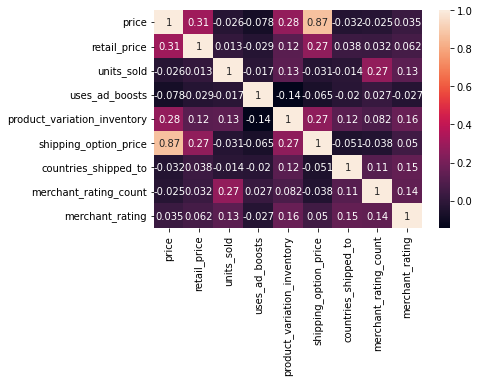

In [ ]:
sb.heatmap(new_df.corr(),annot=True) #see correlation between columns

Shipping Option Price and Price are highly correlated so we may exclude `shipping_option_price`

We can utilise Linear Regression with L2 regularization term but correlation of data is not very high.
As a substitute for this Kernelized Support Vector Regression may also be used. However we don't have a lot of samples to properly train a kernelized SVR.

These are the limitation we might face

In [ ]:
df_train,df_test,y_train,y_test=sk.model_selection.train_test_split(new_df,df['rating'],test_size=0.15) #split in 85:15 ratio
#df_val,df_test,y_val,y_test=sk.model_selection.train_test_split(df_test,y_test,test_size=0.5)

In [ ]:
grid =[{'C': [0.01, 0.1, 1, 10,100], 'kernel': ['rbf'],'epsilon':[1,0.1,0.001]},
       {'C': [0.01, 0.1, 1, 10,100],'degree': [3,5], 'kernel': ['poly'],'epsilon':[1,0.1,0.001]}]

Hyperparameters for SVR are epsilon (the acceptable closeness) , the type of kernel and C (the error margin)

In [ ]:
conti_indices=[0,1,2,7,8] #iterate over columns with continuous data
for i in conti_indices:
  mu=df_train[df_train.columns[i]].mean()
  sig=df_train[df_train.columns[i]].std()
  df_train[df_train.columns[i]]=(df_train[df_train.columns[i]]-mu)/sig #data-mean /std dev
  #df_val[df_val.columns[i]]=(df_val[df_val.columns[i]]-mu)/sig
  df_test[df_test.columns[i]]=(df_test[df_test.columns[i]]-mu)/sig

In [ ]:
model=SVR()

grid_model=GridSearchCV(model, param_grid = grid,scoring = 'neg_mean_squared_error',cv=5) #find the best hyperparameter using grid search

grid_result=grid_model.fit(df_train,y_train) #fit the data
best_params=grid_result.best_params_ # best hyperparameters 
best_svr = SVR(kernel=best_params['kernel'], C=best_params['C'], epsilon=best_params['epsilon']) #svr with optimal hyperparametrs
print('Best Hyperparameters are',best_params)
scoring = {'abs_error': 'neg_mean_absolute_error',
           'squared_error': 'neg_mean_squared_error'}

# Evaluating the RMSE and MAE on the test set
scores = cross_validate(best_svr, df_test, y_test, scoring=scoring)
print("MAE :", abs(scores['test_abs_error'].mean()), "| RMSE :", math.sqrt(abs(scores['test_squared_error'].mean())))
best_svr.fit(df_train,y_train)
predicted=best_svr.predict(df_test) #predict the values with the optimal svr 
print('Predicted Ratings are')
print(predicted)

Best Hyperparameters are {'C': 10, 'epsilon': 0.1, 'kernel': 'rbf'}
MAE : 0.3675984245929912 | RMSE : 0.49632146615383954
Predicted Ratings are
[3.99325325 3.86499563 3.77173063 3.6794749  4.05831312 3.83017872
 3.65466624 3.86388555 3.78807345 3.80979449 3.63433258 3.77713066
 3.81906702 3.82184312 3.90081851 3.89628904 3.65363177 3.87679044
 3.71037739 3.86150399 3.79596603 4.09406759 3.97246445 3.73455943
 3.85758195 3.68143089 3.86648808 3.74102971 3.68143089 3.91354229
 3.66093406 3.90758511 3.67983433 3.83422646 3.99476195 3.87067725
 3.78048282 3.67007924 3.77875864 3.85243983 3.84971592 3.6085946
 3.95206904 3.87624915 3.7873088  3.81758313 3.74452624 3.84042137
 3.67897279 4.01191341 3.78942164 3.75842704 3.56943492 3.9873962
 3.76909273 3.9670072  3.60282754 3.99564309 4.03702027 3.80830049
 3.96293413 3.72182678 3.63863804 3.48024479 3.66857881 3.4605459
 3.60201928 3.68292682 3.98453274 3.38622321 3.77504244 3.79256129
 4.04362379 3.88945679 3.72945639 3.88179565 3.68757845

Using the dataset in 5-fold cross validation in this from the 85% of the original dataset , 68% (4/5) is used for training the rest 17% for validation , effectively making it a 70-15-15 split 

Hyperparameters for Ridge Regression is alpha i.e the coefficient of term assocaited with L2 regularization

In [ ]:
grid_reg =[{'alpha':[1,10,50,100,1000]}]

model=Ridge()
grid_model_reg=GridSearchCV(model, param_grid = grid_reg,scoring = 'neg_mean_squared_error',cv=5)

grid_result_reg=grid_model_reg.fit(df_train,y_train)
best_params_reg=grid_result_reg.best_params_
best_reg = Ridge(alpha=best_params_reg['alpha'])

scoring = {'abs_error': 'neg_mean_absolute_error',
           'squared_error': 'neg_mean_squared_error'}

print(best_params_reg)

# Evaluating the RMSE and MAE on the test set
scores = cross_validate(best_reg, df_test, y_test, scoring=scoring)
print("MAE :", abs(scores['test_abs_error'].mean()), "| RMSE :", math.sqrt(abs(scores['test_squared_error'].mean())))
best_reg.fit(df_train,y_train)
predicted_reg=best_reg.predict(df_test)
print('Predicted Ratings are')
print(predicted_reg)
#sk.metrics.mean_squared_error(predicted,y_test)

{'alpha': 100}
MAE : 0.3555470282281378 | RMSE : 0.48546402291154095
Predicted Ratings are
[3.89231663 3.85293202 3.77895959 3.69229969 3.97506491 3.80298821
 3.57712077 3.82203692 3.70318587 3.83738942 3.60151934 3.70356918
 3.75542952 3.78916492 3.96633742 3.87186887 3.66103261 3.82722282
 3.64716144 3.78934565 3.79816066 4.09505874 3.92514924 3.73811885
 3.76459494 3.71273533 3.76931976 3.66109892 3.71273533 3.80531075
 3.61053273 3.85207108 3.68320037 3.83386677 3.87483282 3.8312045
 3.75713955 3.64202208 3.72500116 3.8054758  3.8135367  3.57591055
 3.87819048 3.85935551 3.78202279 3.77539884 3.78905329 3.76484166
 3.66905213 3.97608772 3.77585289 3.75305767 3.49862648 3.91118564
 3.73969778 3.92261255 3.60667418 3.88686815 3.98191786 3.79052937
 3.85448942 3.67075182 3.64292473 3.47711757 3.53237076 3.52085989
 3.6017478  3.6770067  3.87970327 3.42581041 3.81616717 3.79635399
 3.93545382 3.79571344 3.63072716 3.84172206 3.88648276 3.75509729
 3.68384559 3.7847242  3.68435306 3.722

The models show similar in terms of their precision. Their RMSE values are ~0.5 which is not a lot good considering range of prediction is 0 to 5 only.

In this task which is not critical these may be used if necessary

#Question 3

In [ ]:
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.metrics import accuracy_score, f1_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Reading the data
df_0 = pd.read_csv('0.csv', header = None, encoding= 'unicode_escape') #header is kept none as data doesn't have headers
df_1 = pd.read_csv('1.csv', header = None, encoding= 'unicode_escape')
df_2 = pd.read_csv('2.csv', header = None, encoding= 'unicode_escape')
df_3 = pd.read_csv('3.csv', header = None, encoding= 'unicode_escape')

df = pd.concat([df_0, df_1, df_2, df_3], ignore_index=True)

display(df)

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,26.0,4.0,5.0,8.0,-1.0,-13.0,-109.0,-66.0,-9.0,2.0,...,-28.0,61.0,4.0,8.0,5.0,4.0,-7.0,-59.0,16.0,0
1,-47.0,-6.0,-5.0,-7.0,13.0,-1.0,35.0,-10.0,10.0,-4.0,...,-25.0,47.0,6.0,6.0,5.0,13.0,21.0,111.0,15.0,0
2,-19.0,-8.0,-8.0,-8.0,-21.0,-6.0,-79.0,12.0,0.0,5.0,...,-83.0,7.0,7.0,1.0,-8.0,7.0,21.0,114.0,48.0,0
3,2.0,3.0,0.0,2.0,0.0,22.0,106.0,-14.0,-16.0,-2.0,...,-38.0,-11.0,4.0,7.0,11.0,33.0,39.0,119.0,43.0,0
4,6.0,0.0,0.0,-2.0,-14.0,10.0,-51.0,5.0,7.0,0.0,...,38.0,-35.0,-8.0,2.0,6.0,-13.0,-24.0,-112.0,-69.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11673,-3.0,-1.0,-1.0,-1.0,-28.0,20.0,5.0,0.0,-5.0,0.0,...,-3.0,1.0,4.0,3.0,4.0,-51.0,-49.0,5.0,-9.0,3
11674,-13.0,-5.0,-4.0,-3.0,-4.0,-24.0,-10.0,-8.0,20.0,9.0,...,6.0,-3.0,-3.0,-3.0,-5.0,-4.0,-45.0,-12.0,-15.0,3
11675,-1.0,-3.0,-1.0,1.0,30.0,38.0,-1.0,36.0,-10.0,1.0,...,14.0,-8.0,-4.0,-4.0,-4.0,-21.0,-29.0,-5.0,0.0,3
11676,1.0,4.0,4.0,5.0,9.0,-10.0,4.0,1.0,-2.0,-1.0,...,-16.0,-3.0,0.0,-3.0,-5.0,-36.0,-90.0,3.0,5.0,3


We need to predict discrete variable. It is a supervised learning problem with target variable being the last column which the type of gesture

In [ ]:
for i in df.columns:
  if df[i].isnull().sum()>0:
    print(i,df[i].isnull().sum())

Hence no columns have missing values so no cleaning required


Since this is classification problem with and not a critical task with any risk associated with False Negative or False Positive we can use F1 score

All the variables except the last column are relevant as they contain data from sensors

All the variables from sensors are usable

There are no categorical variables used and no missing data

In [ ]:
X, Y = df.iloc[:, 0:64].copy(),df[64] #X is dataset and Y is target variable 
print(X.shape, Y.shape)

(11678, 64) (11678,)


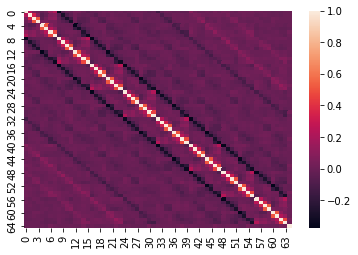

In [ ]:
sb.heatmap(X.corr())

Most of the variables have correlation less than 0.2 hence excluding any variable is not justified

For Classification we can use Support Vector Classifier and Random Forrest Classifier

In [ ]:
X_train, X_test, Y_train, Y_test = sk.model_selection.train_test_split(X , Y, test_size = 0.15, shuffle = True)
print(Y_train.shape)
print(Y_test.shape)

(9926,)
(1752,)


In [ ]:
for i in range(64): #iterate over columns 
  mu=X_train[i].mean()
  sig=X_train[i].std()
  X_train[i]=(X_train[i]-mu)/sig #data-mean /std dev
  X_test[X_test.columns[i]]=(X_test[i]-mu)/sig

For SVC hyperparametrs are C and kernel used.

In [ ]:
grid = {'C': [0.001, 0.01, 0.1, 1, 10], 'kernel': ('linear', 'rbf')}

grid_model_svc = GridSearchCV(estimator=SVC(), param_grid=grid, cv=5)

grid_result_svc = grid_model_svc.fit(X_train, Y_train) # Fitting the data
best_params_svc = grid_result_svc.best_params_

best_svc = SVC(kernel=best_params_svc['kernel'], C=best_params_svc['C']) # Optimal SVC model
best_svc.fit(X_train, Y_train)
predicted_svc = best_svc.predict(X_test)

f1 = f1_score(Y_test, predicted_svc , average='micro') # F1 score and accuracy
accuracy = accuracy_score(Y_test, predicted_svc)

print("F1 score :", f1, "| Accuracy :", accuracy)

F1 score : 0.9235159817351598 | Accuracy : 0.9235159817351598


Hyperparameters for Random Forrest is no of estimators to be used

In [ ]:
grid_rf = {'n_estimators': [10, 50, 100, 500, 1000]}

grid_model_rf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=grid_rf, cv=5) # grid search with 5-fold cross validation

grid_result_rf = grid_model_rf.fit(X_train, Y_train) # Fitting data
best_params_rf = grid_result_rf.best_params_

best_rf = RandomForestClassifier(n_estimators=best_params_rf['n_estimators']) # Optimal model with hyperparameters as found above
best_rf.fit(X_train, Y_train)
predicted_rf = best_rf.predict(X_test)

f1 = f1_score(Y_test, predicted_rf , average='micro') # F1 score and accuracy
accuracy = accuracy_score(Y_test, predicted_rf)

print("F1 score :", f1, "| Accuracy :", accuracy)

F1 score : 0.9200913242009132 | Accuracy : 0.9200913242009132


Both the models show almost similar precision with SVC being marginally higher. However the much training time for SVC can motivate one to use Random Forest instead.

The models show good precision and hence can be used

#Question 4

In [ ]:
n_components_list = [i for i in range(1, 65)]
rmse_list = [] # list of RMSE values obtained
dimensions = [] #Keeping the RMSE less than 1% of the std of the L2 norm of X

for n_components in n_components_list: #dimension reduction loop

    pca = PCA(n_components=n_components)
    pca.fit(X)
    X_new = pca.transform(X)

    X_recon = pca.inverse_transform(X_new) # Reconstructing the original data from the transformed data

    sq_error = np.square(X - X_recon) # RMSE value after reconstruction
    rmse=math.sqrt(np.sum(sq_error)/float(X.size))
    rmse_list.append(rmse)

    X_sq = np.square(X) # std dev of the L2 norm of X
    X_norms = np.sqrt(np.sum(X_sq, axis = 1))
    std_X_norm = np.std(X_norms)

    if rmse < 0.01*std_X_norm: #Check if reconstruction RMSE error is less than 1% of std dev of L2 norm
        dimensions.append(n_components)

print(dimensions) #it stores the number of dimensions that satisfy the criteria

[64]


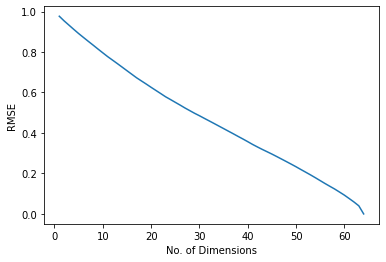

In [ ]:
pyplot.plot(n_components_list, rmse_list)
pyplot.xlabel("No. of Dimensions")
pyplot.ylabel("RMSE")
pyplot.show()

Hence we attain reconstruction error required less than threshold given only if we all 64 dimensions are reatined which is as good as retaining all the data

#References


*   https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c
*   https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
* https://www.mygreatlearning.com/blog/gridsearchcv/

